# Chapter 3. Linear Regression

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [28]:
boston = pd.read_csv("./data/Boston.csv")

In [20]:
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Simple Linear Regression

In [16]:
boston.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'black', u'lstat', u'medv'],
      dtype='object')

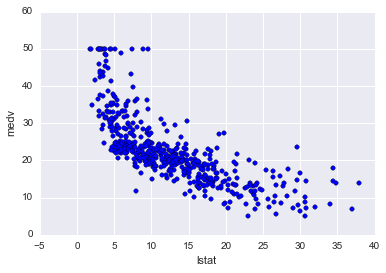

In [31]:
# relation between 
# lstat (population with low status)
# medv (median value)
plt.scatter(boston.lstat, boston.medv)
plt.xlabel("lstat")
plt.ylabel("medv")

In [64]:
# The statsmodels library provides a small subset of models, but has more emphasis on
# parameter estimation and statistical testing. The summary output is similar to R's
# summary function.
# X is an "array" of column values, y is a single column value
X = boston.lstat.values
X = sm.add_constant(X)  # add the intercept term (1)
y = boston.medv.values
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 25 Dec 2015   Prob (F-statistic):           5.08e-88
Time:                        22:17:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Scikit Learn provides a larger number of models, but has more of a Machine Learning POV
# and doesn't come with the statistical testing data shown above. However, it produces an
# identical linear model as shown below:
X = boston[['lstat']].values
y = boston.medv.values
reg = LinearRegression()
reg.fit(X,y)

print reg.coef_
print reg.intercept_
print reg.score(X,y) #R2


[-0.95004935]
34.5538408794
0.544146297586


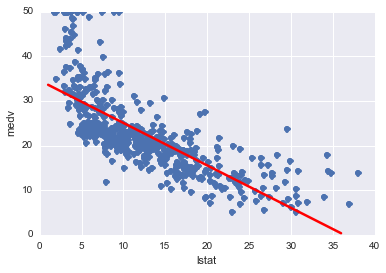

In [98]:
# draw regression line
plt.plot(boston.lstat, boston.medv, "o")
plt.xlabel("lstat")
plt.ylabel("medv")

xs = range(int(np.min(boston.lstat)), int(np.max(boston.lstat)))
ys = [reg.predict([x]) for x in xs]
plt.plot(xs,ys,"r", linewidth = 2.5)



### Multiple Linear Regression

### Interactive Terms

### Non-linear Transformations of the Predictors

### Qualitative Predictors